process a mock square image without a mask to see what happens

useful for testing of new code in `fringeprocess.py`

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

In [15]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
img_filename = image_folder / "g1.bmp"

In [16]:
img = Image.open(img_filename)
# equivalent to un weighted mean of RGB channels
img = img.convert("L", matrix=(1 / 3.0, 1 / 3.0, 1 / 3.0, 0.0))
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [17]:
xygb = np.array(
    [
        [146.0, 180.0],
        [
            931.0,
            180.0,
        ],
        [931.0, 946.0],
    ]
)

In [18]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)

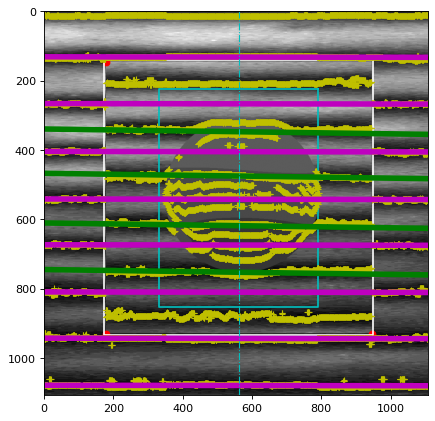

In [19]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ph.draw_gauge(axes, img_array, drawdata)

In [20]:
ffrac

np.float64(0.4599627836028695)